# Stochastic gradient descent 

The stochastic gradient decent regressor is a machine learning algorithm that uses a gradient descent approach to optimize the parameters of a model. This approach allows the algorithm to adapt quickly and efficiently to changes in the data, making it an ideal choice for predictive modeling tasks. Additionally, because this method does not require any knowledge of the underlying distribution of the data, it is often used for datasets that are too large or complex to be handled by other methods.

for the prediction we used in data/data_prep_reg.csv the statistic values of the features: f.e:
for temperature : 
- max: max value
- min: min value
- mean: mean value
- std: standard deviation
- var: variation
- median: median value
- ptp: peak to peak

In [73]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [11]:
# Import Data

# Import Data

data = pd.read_csv('data/data_prep_reg.csv', index_col=[0]) # includes the statistics of the features only location D
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0]) # includes all values as a new features only location D
#data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0]) # include the statistics of the features an all locations

print(f'Data: {data.shape}')


Data: (4990, 44)


In [12]:
#fillna
data = data.fillna(data.mean())

In [13]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667


In [14]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 42)
y: (4990,)
X_train: (3493, 42)
y_train: (3493,)
X_test: (1497, 42)
y_test: (1497,)


In [15]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

# SGD Regressor

In [16]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Instantiate our model 
sgd_reg = SGDRegressor()
sgd_reg_scaled = SGDRegressor()

# Train the model using our data
sgd_reg.fit(X_train, y_train)
sgd_reg_scaled.fit(X_train_scaled, y_train)

SGDRegressor()

In [18]:
# predict

y_pred_train = sgd_reg.predict(X_train)
y_pred_test = sgd_reg.predict(X_test)

y_pred_train_scaled = sgd_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = sgd_reg_scaled.predict(X_test_scaled)

# error analysis 

rsme_sgd_reg_train = rmse(y_train, y_pred_train)
rsme_sgd_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_reg_train}')
print(f'RSME _ test: {rsme_sgd_reg_test}')

rsme_sgd_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_sgd_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_sgd_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_sgd_reg_test_scaled:.2f}')

RSME _ train: 1.8579936637236576e+16
RSME _ test: 1.8622386014913836e+16
RSME _ train_scaled: 26.06
RSME _ test_scaled: 28.14


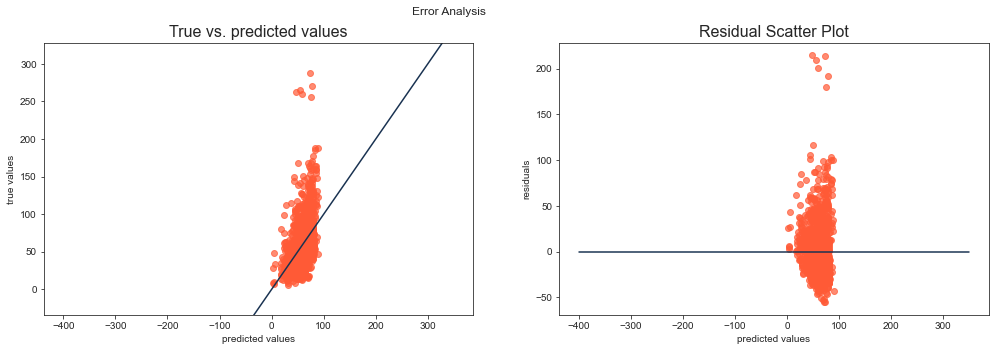

In [19]:
# error analysis test:
error_analysis(y_test, y_pred_test_scaled)

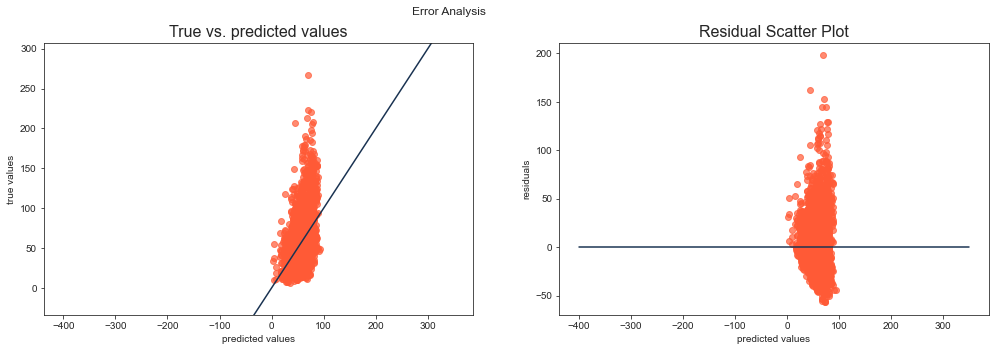

In [20]:
# error analysis train:
error_analysis(y_train, y_pred_train_scaled)

## with polynomial features and scaled data

In [40]:
"""# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)   # x , x2
X_poly_test = polynomial_features.transform(X_test)

# scaling data
scalar = StandardScaler()
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

# train model 
model_poly = SGDRegressor(penalty='l2', 
                        max_iter=10000,
                        learning_rate='optimal'
                        )
model_poly.fit(X_poly_train, y_train)

# predict
#y_pred_test = model_poly.predict(X_test_scaled)
#y_pred_train = model_poly.predict(X_train_scaled)
y_pred_train = model_poly.predict(X_poly_train)
y_pred_test = model_poly.predict(X_poly_test)

rsme_sgd2_train = rmse(y_train, y_pred_train)

rsme_sgd2_train"""

6.7098701587996855e+25

In [76]:
# pipeline for preprocessing and initialization of the model 

model_poly = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                        StandardScaler(),
                        
                        SGDRegressor(penalty='l2', 
                        max_iter=1000,
                        learning_rate='optimal'
                        ))

# train the model
model_poly.fit(X_train, y_train)

y_pred_train = model_poly.predict(X_train)
y_pred_test = model_poly.predict(X_test)

rsme_sgd2_train = rmse(y_train, y_pred_train)
rsme_sgd2_train

24903223132660.844

In [77]:
y_pred_train

array([-5.37746190e+12,  5.43913657e+12,  6.59330286e+12, ...,
       -4.59483201e+12, -6.54868892e+12, -8.17594480e+11])

In [74]:
y_train_predicted = cross_val_predict(model_poly, X_train, y_train, cv=5)

In [75]:
y_train_predicted


array([ 4.99405742e+12,  2.57754514e+12, -1.27213134e+13, ...,
        1.58696626e+12,  5.86014695e+12, -5.22951331e+12])

In [63]:
# TODO : maybe the prediction is done different with pipeline ? 
y_pred_train

array([ 4.20426977e+12, -3.11388593e+12, -6.28688452e+12, ...,
       -5.21002459e+12,  5.08514993e+12, -1.11024265e+12])

In [60]:
model_poly.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(include_bias=False)),
  ('standardscaler', StandardScaler()),
  ('sgdregressor', SGDRegressor(learning_rate='optimal', penalty='l1'))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(include_bias=False),
 'standardscaler': StandardScaler(),
 'sgdregressor': SGDRegressor(learning_rate='optimal', penalty='l1'),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': False,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdregressor__alpha': 0.0001,
 'sgdregressor__average': False,
 'sgdregressor__early_stopping': False,
 'sgdregressor__epsilon': 0.1,
 'sgdregressor__eta0': 0.01,
 'sgdregressor__fit_intercept': True,
 'sgdregressor__l1_ratio': 0.15,
 'sgdregressor__learning_rate': 'optimal',
 'sgdregressor__loss': 'squared_error',
 'sgdregressor__max_ite

In [47]:
y_pred = reg.predict(X_train)
reg_rsme = rmse(y_train, y_pred)



28.011757422634336

In [22]:
y_pred_test

array([1.11198268e+16, 7.90315090e+15, 1.22762686e+16, ...,
       5.64998913e+15, 9.17752600e+15, 1.32904337e+16])

RSME _ train: 11503483460522626.00
RSME _ test: 11562584053627020.00


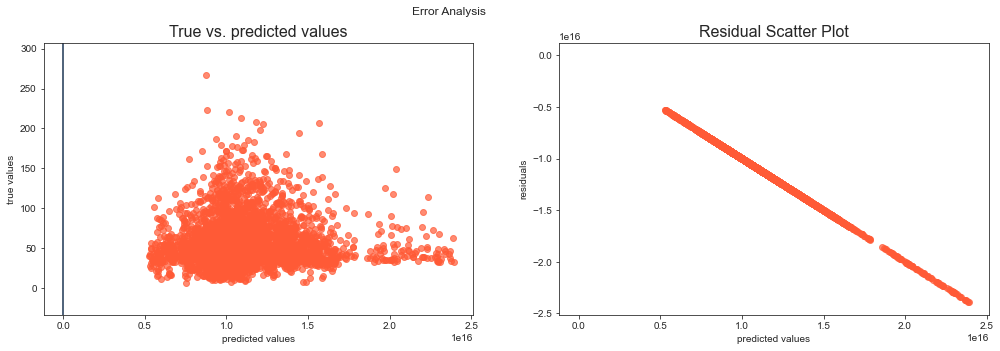

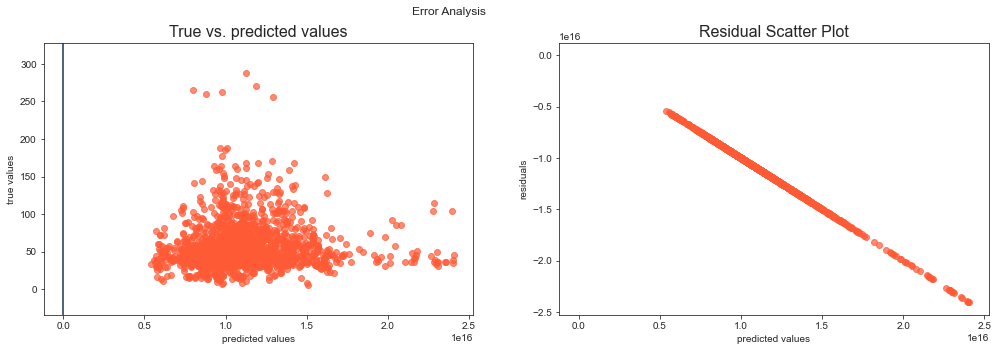

In [23]:
# error analysis 
rsme_sgd2_train = rmse(y_train, y_pred_train)
rsme_sgd2_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd2_train:.2f}')
print(f'RSME _ test: {rsme_sgd2_test:.2f}')

error_analysis(y_train, y_pred_train)
error_analysis(y_test, y_pred_test)

# Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Defining parameter grid (as dictionary)
param_grid = {"alpha" : [0.00001,0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "l1", "elasticnet"]
             }
gs = GridSearchCV(SGDRegressor(random_state=100), param_grid, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes

gs.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 2/5] END ..alpha=1e-05, penalty=l2;, score=-775990494.214 total time=   0.9s
[CV 4/5] END ..alpha=1e-05, penalty=l2;, score=-440234208.945 total time=   1.3s
[CV 5/5] END ..alpha=1e-05, penalty=l2;, score=-421790010.137 total time=   1.5s
[CV 2/5] END ..alpha=1e-05, penalty=l1;, score=-777473496.576 total time=   1.4s
[CV 1/5] END ..alpha=1e-05, penalty=l2;, score=-384637165.806 total time=   1.7s
[CV 3/5] END ..alpha=1e-05, penalty=l2;, score=-349852575.659 total time=   1.6s
[CV 3/5] END ..alpha=1e-05, penalty=l1;, score=-350834009.191 total time=   2.5s
[CV 1/5] END ..alpha=1e-05, penalty=l1;, score=-385752442.647 total time=   2.6s
[CV 2/5] END alpha=1e-05, penalty=elasticnet;, score=-776212719.951 total time=   1.4s
[CV 4/5] END ..alpha=1e-05, penalty=l1;, score=-451642132.860 total time=   2.2s
[CV 5/5] END ..alpha=1e-05, penalty=l1;, score=-422896045.426 total time=   2.3s
[CV 2/5] END .alpha=0.0001, penalty=l2;, s

/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END .......alpha=0.01, penalty=l2;, score=-17441.880 total time=   7.8s
[CV 1/5] END .......alpha=0.01, penalty=l2;, score=-15321.424 total time=   7.9s
[CV 4/5] END ...alpha=0.01, penalty=l1;, score=-499357109.807 total time=   2.7s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END ...alpha=0.01, penalty=l1;, score=-443511581.600 total time=   2.7s
[CV 3/5] END .......alpha=0.01, penalty=l2;, score=-13452.576 total time=   8.3s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END .......alpha=0.01, penalty=l2;, score=-16416.334 total time=   7.8s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END .......alpha=0.01, penalty=l2;, score=-15785.484 total time=   7.9s
[CV 1/5] END ...........alpha=0.1, penalty=l2;, score=-26.059 total time=   1.0s
[CV 3/5] END ...........alpha=0.1, penalty=l2;, score=-26.079 total time=   1.1s
[CV 2/5] END ...........alpha=0.1, penalty=l2;, score=-30.526 total time=   1.3s
[CV 4/5] END ...........alpha=0.1, penalty=l2;, score=-25.762 total time=   1.1s
[CV 5/5] END ...........alpha=0.1, penalty=l2;, score=-29.099 total time=   1.0s
[CV 2/5] END ....alpha=0.1, penalty=l1;, score=-612786727.578 total time=   2.1s
[CV 1/5] END ....alpha=0.1, penalty=l1;, score=-396902442.249 total time=   2.7s
[CV 3/5] END ....alpha=0.1, penalty=l1;, score=-352268181.014 total time=   2.7s
[CV 4/5] END ....alpha=0.1, penalty=l1;, score=-391134669.558 total time=   2.8s
[CV 5/5] END ....alpha=0.1, penalty=l1;, score=-469172852.556 total time=   2.6s
[CV 1/5] END ...alpha=0.1, penalty=elasticnet;, score=-25.616 total time=   2.8s
[CV 3/5] END ...alpha=0.1, p

/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.01, penalty=elasticnet;, score=-59907.899 total time=  13.0s
[CV 4/5] END ...alpha=0.1, penalty=elasticnet;, score=-25.854 total time=   2.4s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.01, penalty=elasticnet;, score=-70229.769 total time=  12.1s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.01, penalty=elasticnet;, score=-54509.976 total time=  12.2s
[CV 3/5] END alpha=0.01, penalty=elasticnet;, score=-52864.866 total time=  12.3s
[CV 5/5] END ...alpha=0.1, penalty=elasticnet;, score=-27.613 total time=   2.1s


/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.01, penalty=elasticnet;, score=-62144.154 total time=  12.3s


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=100), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_root_mean_squared_error', verbose=5)

In [26]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

    
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
sgd_best = gs.best_estimator_

# Making predictions on the test set
y_pred_test = sgd_best.predict(X_test_scaled)
y_pred_train = sgd_best.predict(X_train_scaled)

Best score: -26.578
Best parameters: {'alpha': 0.1, 'penalty': 'elasticnet'}


In [27]:
rsme_sgd_best_train = rmse(y_train, y_pred_train)
rsme_sgd_best_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_best_train}')
print(f'RSME _ test: {rsme_sgd_best_test}')

RSME _ train: 25.76429767857821
RSME _ test: 27.858874152713152


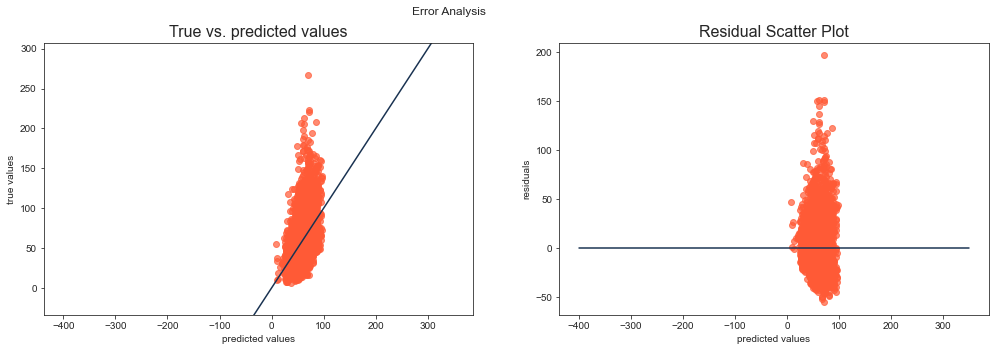

In [28]:
# error analysis train:
error_analysis(y_train, y_pred_train)